# U.S. Medical Insurance Costs

In [64]:
#All libraries being used
import csv as c
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
def csvtodict(csvfile):
    with open(csvfile) as csv:
        insurance_info = c.DictReader(csv)
        headers = insurance_info.fieldnames
        ins_dict = dict()
        for i in range(len(headers)):
            ins_dict[headers[i]] = []
        for row in insurance_info:
            for i in ins_dict:
                ins_dict[i].append(row[i])
    return ins_dict


In [35]:
ins_dict = csvtodict('insurance.csv')


In [36]:
#turn lists into correct datatypes
def float_lst(lst):
    for x in range(len(lst)):
        lst[x] = float(lst[x])
    return lst

In [37]:
ins_dict['age'] = float_lst(ins_dict['age'])
ins_dict['bmi'] = float_lst(ins_dict['bmi'])
ins_dict['children'] = float_lst(ins_dict['children'])
ins_dict['charges'] = float_lst(ins_dict['charges'])

In [38]:
#turn gender into binary
for i in range(len(ins_dict['sex'])):
    if ins_dict['sex'][i] == 'male':
        ins_dict['sex'][i] = 0
    else:
        ins_dict['sex'][i] = 1
        
#turn smoker into binary
for i in range(len(ins_dict['smoker'])):
    if ins_dict['smoker'][i] == 'no':
        ins_dict['smoker'][i] = 0
    else:
        ins_dict['smoker'][i] = 1


In [39]:
def listsort(inputlist):
    output = dict()
    for i in inputlist:
        if i in output:
            output[i].append(1)
        else:
            output[i] = []
    for i in output:
        output[i] = sum(output[i])
    return output

In [40]:
def avg(lst):
    return sum(lst)/len(lst)

In [41]:
print('proportion of women ' + str(avg(ins_dict['sex'])))
print('Average age '+ str(avg(ins_dict['age'])))
print('Average bmi ' + str(avg(ins_dict['bmi'])))
print('Average number of children ' + str(avg(ins_dict['children'])))
print('proportion of smokers ' + str(avg(ins_dict['smoker'])))
print(listsort(ins_dict['region']))
print('Average charges ' + str(avg(ins_dict['charges'])))

proportion of women 0.4947683109118087
Average age 39.20702541106129
Average bmi 30.663396860986538
Average number of children 1.0949177877429
proportion of smokers 0.20478325859491778
{'southwest': 324, 'southeast': 363, 'northwest': 324, 'northeast': 323}
Average charges 13270.422265141257


In [42]:
#seperate female and male 
female_charges = []
male_charges = []
for i in range(len(ins_dict['sex'])):
    if ins_dict['sex'][i] == 1:
        female_charges.append(ins_dict['charges'][i])
    else:
        male_charges.append(ins_dict['charges'][i])


# Data Reading and Cleaning


## Clean Data
### Create Pandas DataFrame

In [43]:
#create pandas dataFrame
insurance_data = pd.DataFrame(ins_dict)
insurance_data.head()


,age,sex,bmi,children,smoker,region,charges
0,19.0,1,27.900,0.0,1,southwest,16884.92400
1,18.0,0,33.770,1.0,0,southeast,1725.55230
2,28.0,0,33.000,3.0,0,southeast,4449.46200
3,33.0,0,22.705,0.0,0,northwest,21984.47061
4,32.0,0,28.880,0.0,0,northwest,3866.85520


### Check for Null Values

In [44]:
insurance_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Seperate and Format Columns Appropriate for Study

In [45]:
#seperate sex
males_data = insurance_data[insurance_data['sex'] == 0]
females_data = insurance_data[insurance_data['sex'] == 1]


## Reading the Data


In [46]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 73.3+ KB


In [47]:
males_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 1 to 1333
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       676 non-null    float64
 1   sex       676 non-null    int64  
 2   bmi       676 non-null    float64
 3   children  676 non-null    float64
 4   smoker    676 non-null    int64  
 5   region    676 non-null    object 
 6   charges   676 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 42.2+ KB


In [48]:
females_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       662 non-null    float64
 1   sex       662 non-null    int64  
 2   bmi       662 non-null    float64
 3   children  662 non-null    float64
 4   smoker    662 non-null    int64  
 5   region    662 non-null    object 
 6   charges   662 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 41.4+ KB


### Summarizing Ordinal Data

In [123]:
def ordinal_info(df):
    '''ordinal_info(DataFrame)
    Takes in a data frame, removes Object Dtypes and then summarizes the other
    columns in that DF with the Describe method and using Histograms 
    Needs matplotlib.pyplot and pandas imported'''
    non_ordinal_col = df.select_dtypes(include = 'object').columns
    for i in df.columns.drop(non_ordinal_col):
        print(i[0].upper() + i[1:] + ' Statistics')
        print(df[i].describe())
        plt.hist(df[i], rwidth = .75)
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.show()

Age Statistics
count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


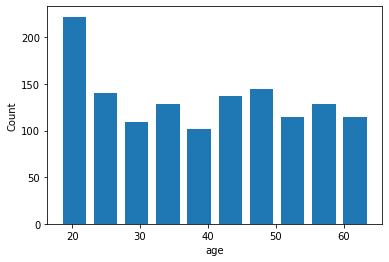

Sex Statistics
count    1338.000000
mean        0.494768
std         0.500160
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64


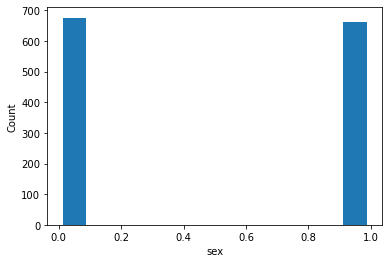

Bmi Statistics
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


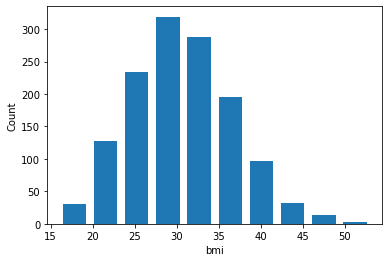

Children Statistics
count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64


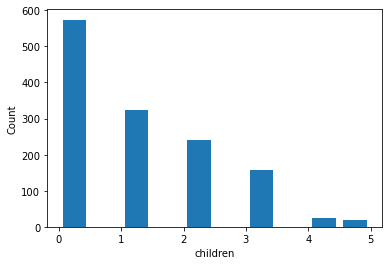

Smoker Statistics
count    1338.000000
mean        0.204783
std         0.403694
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: smoker, dtype: float64


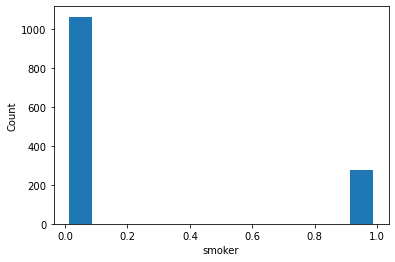

Charges Statistics
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


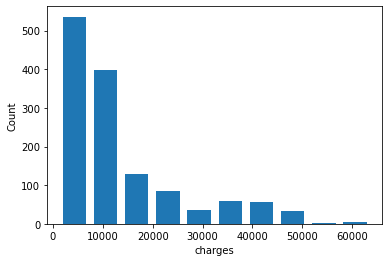

In [111]:
ordinal_info(insurance_data)

Age Statistics
count    676.000000
mean      38.917160
std       14.050141
min       18.000000
25%       26.000000
50%       39.000000
75%       51.000000
max       64.000000
Name: age, dtype: float64


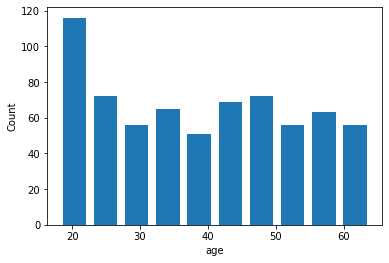

Sex Statistics
count    676.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: sex, dtype: float64


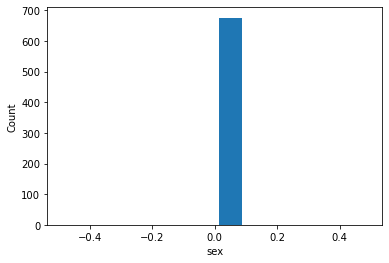

Bmi Statistics
count    676.000000
mean      30.943129
std        6.140435
min       15.960000
25%       26.410000
50%       30.687500
75%       34.992500
max       53.130000
Name: bmi, dtype: float64


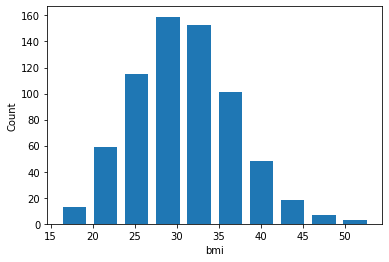

Children Statistics
count    676.000000
mean       1.115385
std        1.218986
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: children, dtype: float64


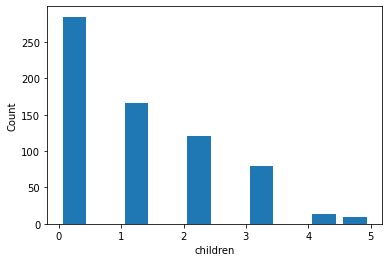

Smoker Statistics
count    676.000000
mean       0.235207
std        0.424442
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: smoker, dtype: float64


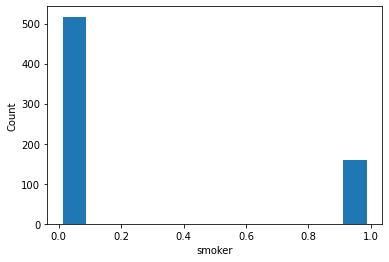

Charges Statistics
count      676.000000
mean     13956.751178
std      12971.025915
min       1121.873900
25%       4619.134000
50%       9369.615750
75%      18989.590250
max      62592.873090
Name: charges, dtype: float64


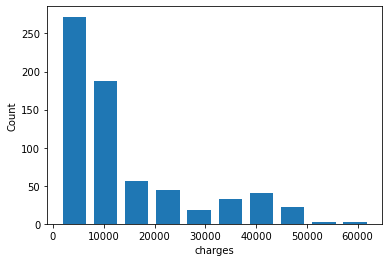

In [112]:
ordinal_info(males_data)

Age Statistics
count    662.000000
mean      39.503021
std       14.054223
min       18.000000
25%       27.000000
50%       40.000000
75%       51.750000
max       64.000000
Name: age, dtype: float64


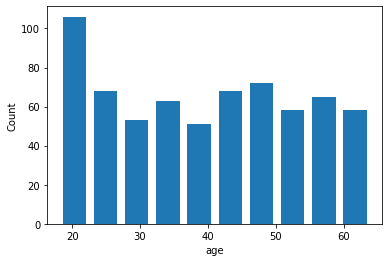

Sex Statistics
count    662.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: sex, dtype: float64


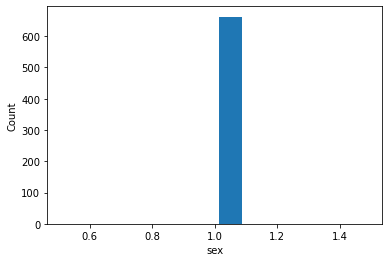

Bmi Statistics
count    662.000000
mean      30.377749
std        6.046023
min       16.815000
25%       26.125000
50%       30.107500
75%       34.313750
max       48.070000
Name: bmi, dtype: float64


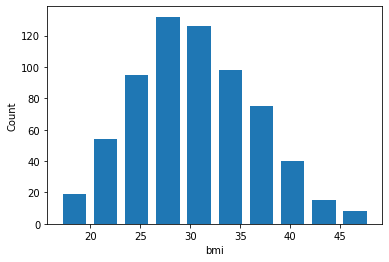

Children Statistics
count    662.000000
mean       1.074018
std        1.192115
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: children, dtype: float64


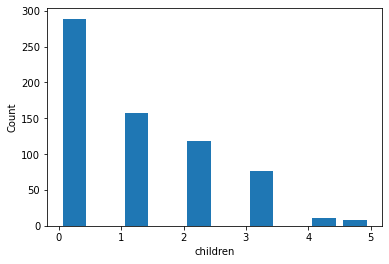

Smoker Statistics
count    662.000000
mean       0.173716
std        0.379152
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: smoker, dtype: float64


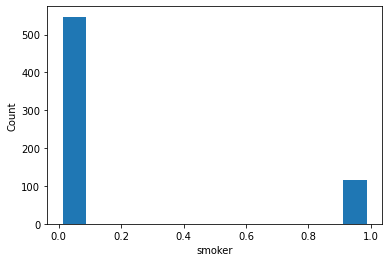

Charges Statistics
count      662.000000
mean     12569.578844
std      11128.703801
min       1607.510100
25%       4885.158700
50%       9412.962500
75%      14454.691825
max      63770.428010
Name: charges, dtype: float64


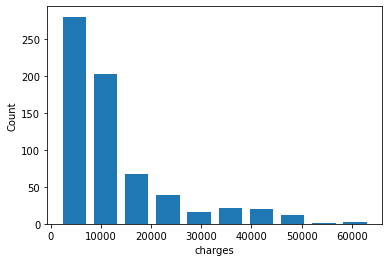

In [113]:
ordinal_info(females_data)

### Summarizing Categorical Data

In [116]:
def nominal_info(df):
    nominal_col = df.select_dtypes(include = 'object').columns
    for i in df[nominal_col].columns:
        print(i[0].upper() + i[1:] + ' Statistics')
        print(df[i].describe())
        print(df[i].value_counts())
        plt.hist(df[i], rwidth = .75)
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.show()

Region Statistics
count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


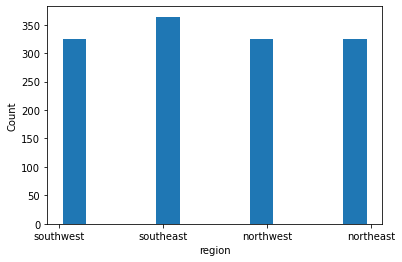

In [117]:
nominal_info(insurance_data)

Region Statistics
count           676
unique            4
top       southeast
freq            189
Name: region, dtype: object
southeast    189
northeast    163
southwest    163
northwest    161
Name: region, dtype: int64


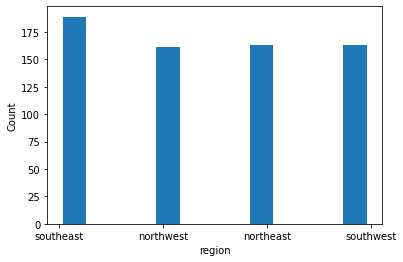

In [118]:
nominal_info(males_data)

Region Statistics
count           662
unique            4
top       southeast
freq            175
Name: region, dtype: object
southeast    175
northwest    164
southwest    162
northeast    161
Name: region, dtype: int64


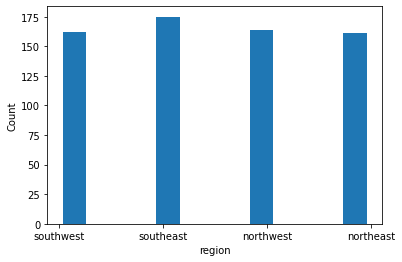

In [119]:
nominal_info(females_data)

<AxesSubplot:xlabel='sex', ylabel='count'>

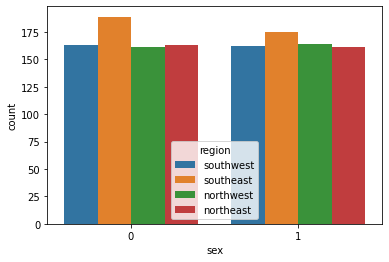

In [76]:
#visualize data
sns.countplot(x = 'sex', hue = 'region', data = insurance_data)

In [55]:
#ftest from https://www.statology.org/f-test-python/ by Zach July 14, 2020 accessed 11/13/2022 

#define F-test function
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    xvar = np.var(x, ddof=1)
    yvar = np.var(y, ddof=1)
    #find which variance is larger jg
    if xvar > yvar:
        bigvar = xvar
        smallvar = yvar
    else:
        bigvar = yvar
        smallvar = xvar
    f = bigvar/smallvar #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p



In [62]:
#test for variance equivalance and then use the appropriate T test, either Two Sample Independent or Welch's

var_equal = f_test(males_data['charges'], females_data['charges'])
if var_equal[1] > 0.05:
    print('Evidence for equal variance so we will use Independent Two Sample t-Test')
    print(ttest_ind(males_data['charges'], females_data['charges']))
else:
    print('Evidence for unequal variance so we will use Welch T test')
    print(ttest_ind(males_data['charges'], females_data['charges'], equal_var = False))

Evidence for unequal variance so we will use Welch T test
Ttest_indResult(statistic=2.1008878232359565, pvalue=0.035841014956016645)


In [63]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [124]:
print(ordinal_info.__doc__)

ordinal_info(DataFrame)
    Takes in a data frame, seperates Object Dtypes and then summarizes the other
    columns in that DF with the Describe method and using Histograms 
    Needs matplotlib.pyplot and pandas imported
